In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df= pd.read_csv('dataset_limpio.csv')

In [4]:
df

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2
0,PH,-34.661824,-58.508839,62000.000000,40.0,Mataderos,Mataderos,14555.078219,1127.272727,bajo
1,apartment,-34.652262,-58.522982,72000.000000,55.0,Mataderos,Mataderos,15988.570648,1309.090909,bajo
2,apartment,-38.002626,-57.549447,64000.000000,35.0,Mar del Plata,Centro,221376.145262,1828.571429,medio
3,PH,-34.532957,-58.521782,130000.000000,78.0,Vicente López,Munro,16182.270448,1226.415094,bajo
4,apartment,-34.559873,-58.443362,138000.000000,40.0,Belgrano,Belgrano,7381.316759,3066.666667,alto
...,...,...,...,...,...,...,...,...,...,...
95801,store,-34.490090,-58.530280,281142.857143,123.0,San Isidro,San Isidro,17881.899471,2285.714286,alto
95802,apartment,-34.562700,-58.458290,870000.000000,93.0,Belgrano,Belgrano,8904.350856,7699.115044,alto
95803,house,-34.463120,-58.534810,498000.000000,360.0,San Isidro,Beccar,18984.396239,1383.333333,medio
95804,apartment,-34.570639,-58.475596,131500.000000,39.0,Villa Urquiza,Villa Urquiza,10670.153356,2858.695652,alto


# Baseline

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [6]:
X = df[['surface_covered_in_m2']]
y = df.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [7]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [8]:
predictions = lm.predict(X_test)

In [9]:
y_train

87886    1.540000e+05
32632    3.450000e+05
50330    6.990000e+04
32581    2.950000e+05
60853    1.658948e+05
             ...     
17772    1.150000e+05
65648    1.300000e+05
65906    1.531250e+05
51483    1.300000e+06
25370    1.900000e+05
Name: price_aprox_usd, Length: 71854, dtype: float64

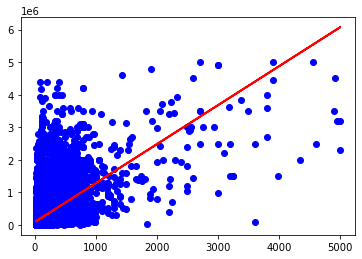

In [10]:
plt.scatter(X_train, y_train, c='blue')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2)
# plt.xscale('log')
# plt.yscale('log')

In [11]:
RMSE = mean_squared_error(y_test, predictions, squared= False)
RMSE

227231.99560554652

In [16]:
df_depto = df[df.property_type == 'apartment']
df_depto

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2
1,apartment,-34.652262,-58.522982,72000.000000,55.0,Mataderos,Mataderos,15988.570648,1309.090909,bajo
2,apartment,-38.002626,-57.549447,64000.000000,35.0,Mar del Plata,Centro,221376.145262,1828.571429,medio
4,apartment,-34.559873,-58.443362,138000.000000,40.0,Belgrano,Belgrano,7381.316759,3066.666667,alto
5,apartment,-34.559873,-58.443362,195000.000000,60.0,Belgrano,Belgrano,7381.316759,3000.000000,alto
6,apartment,-34.486019,-58.503814,115000.000000,36.0,San Isidro,Martínez,15299.501265,2948.717949,alto
...,...,...,...,...,...,...,...,...,...,...
95795,apartment,-32.000000,-64.000000,84518.100000,52.0,NaN,Córdoba,641427.112303,1625.348077,medio
95798,apartment,-34.477060,-58.501770,399115.044248,205.0,San Isidro,Acassuso,15346.031516,1946.902655,alto
95802,apartment,-34.562700,-58.458290,870000.000000,93.0,Belgrano,Belgrano,8904.350856,7699.115044,alto
95804,apartment,-34.570639,-58.475596,131500.000000,39.0,Villa Urquiza,Villa Urquiza,10670.153356,2858.695652,alto


<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_aprox_usd'>

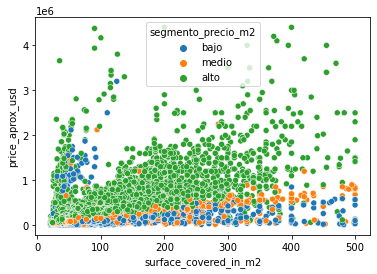

In [24]:
sns.scatterplot(data=df_depto, x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')


In [32]:
X = df_depto[['surface_covered_in_m2']]
y = df_depto.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

RMSE_depto = mean_squared_error(y_test, predictions, squared= False)
RMSE_depto


192286.6347610432

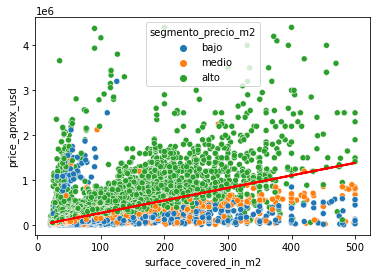

In [31]:
sns.scatterplot(data=df_depto, x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2)

In [17]:
df_casa = df[df.property_type == 'house']
df_casa

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2
9,house,-34.587911,-58.698783,2.500000e+05,164.0,San Miguel,Bella Vista,35349.816514,1524.390244,medio
12,house,-34.425087,-58.579658,5.700000e+05,270.0,Tigre,Tigre,24445.655404,2111.111111,alto
14,house,-31.052985,-64.499128,3.964399e+04,148.0,Villa Giardino,Villa Giardino,707302.282443,267.864769,bajo
16,house,-34.650116,-58.966034,2.900000e+05,200.0,General Rodríguez,General Rodríguez,65156.401814,1450.000000,medio
20,house,-34.364092,-58.689735,2.650000e+05,190.0,Tigre,Barrio San Gabriel,37093.806594,1152.173913,bajo
...,...,...,...,...,...,...,...,...,...,...
95796,house,-34.333330,-58.750000,2.175108e+05,178.0,Escobar,Escobar,43989.117122,1221.970840,bajo
95797,house,-34.493970,-58.516790,2.414458e+05,120.0,San Isidro,Martínez,16408.946342,2012.048193,alto
95799,house,-34.477060,-58.501770,8.176991e+05,420.0,San Isidro,Acassuso,15346.031516,1946.902655,alto
95800,house,-34.493970,-58.516790,1.207229e+06,600.0,San Isidro,Martínez,16408.946342,2012.048193,alto


In [33]:
X = df_casa[['surface_covered_in_m2']]
y = df_casa.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

RMSE_casa = mean_squared_error(y_test, predictions, squared= False)
RMSE_casa


231423.85846193056

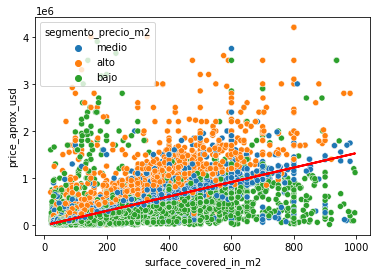

In [34]:
sns.scatterplot(data=df_casa, x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2)

In [18]:
df_store = df[df.property_type == 'store']
df_store

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2
51,store,-34.563972,-58.456535,250000.000000,30.0,Belgrano,Belgrano,8695.892070,8333.333333,alto
81,store,-31.376408,-64.212330,75000.000000,180.0,Córdoba,Córdoba,672184.986938,1139.263323,bajo
167,store,-34.606297,-58.392189,295000.000000,103.0,Congreso,Congreso,1185.555570,2864.077670,alto
176,store,-34.590181,-58.449152,175000.000000,80.0,Chacarita,Chacarita,7581.832011,2187.500000,alto
306,store,-34.595967,-58.409774,139000.000000,33.0,Recoleta,Recoleta,3191.406723,4212.121212,alto
...,...,...,...,...,...,...,...,...,...,...
95625,store,-34.595772,-58.385802,381250.000000,122.0,Recoleta,Recoleta,736.643346,3125.000000,alto
95657,store,-34.606977,-58.376367,426084.744167,287.0,NaN,Capital Federal,584.936148,1484.615833,medio
95700,store,-34.649660,-58.383410,355000.000000,169.0,Barracas,Barracas,2596.027124,2100.591716,alto
95741,store,-34.637014,-58.433177,210000.000000,403.0,NaN,Capital Federal,6039.195608,521.091811,bajo


In [35]:
X = df_store[['surface_covered_in_m2']]
y = df_store.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

RMSE_store = mean_squared_error(y_test, predictions, squared= False)
RMSE_store


427159.47352387477

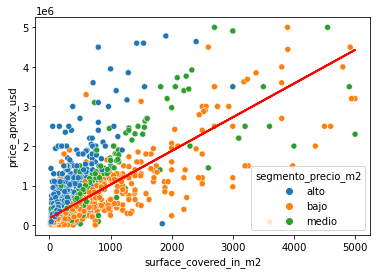

In [36]:
sns.scatterplot(data=df_store, x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2)

In [19]:
df_ph = df[df.property_type == 'PH']
df_ph

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2
0,PH,-34.661824,-58.508839,62000.000,40.0,Mataderos,Mataderos,14555.078219,1127.272727,bajo
3,PH,-34.532957,-58.521782,130000.000,78.0,Vicente López,Munro,16182.270448,1226.415094,bajo
10,PH,-34.652356,-58.501624,239000.000,98.0,Mataderos,Mataderos,13651.907067,1707.142857,medio
28,PH,-34.527253,-58.512877,169000.000,160.0,Vicente López,Munro,15323.042057,982.558140,bajo
40,PH,-34.451854,-58.903567,165000.000,140.0,Pilar,Pilar,58826.175270,1178.571429,bajo
...,...,...,...,...,...,...,...,...,...,...
95658,PH,-34.640447,-58.419682,492240.000,70.0,Boedo,Boedo,4714.731123,7032.000000,alto
95662,PH,-32.000000,-64.000000,211355.053,140.0,NaN,Córdoba,641427.112303,1509.678950,medio
95676,PH,-34.623575,-58.466642,220000.000,206.0,Flores,Flores,9536.565562,2076.923077,alto
95723,PH,-34.420580,-58.582790,155000.000,100.0,Tigre,Tigre,24873.611776,1650.000000,medio


In [38]:
X = df_ph[['surface_covered_in_m2']]
y = df_ph.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

RMSE_ph = mean_squared_error(y_test, predictions, squared= False)
RMSE_ph

129863.02290199204

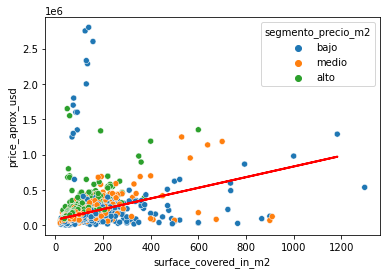

In [40]:
sns.scatterplot(data=df_ph, x="surface_covered_in_m2", y="price_aprox_usd", hue= 'segmento_precio_m2')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2)

In [60]:
rmse_dict = {'RMSE_ph' :RMSE_ph  , 'RMSE_casa':RMSE_casa, 'RMSE_depto':RMSE_depto, 'RMSE_store':RMSE_store, 'RMSE':RMSE}
rmse_dict

{'RMSE_ph': 129863.02290199204,
 'RMSE_casa': 231423.85846193056,
 'RMSE_depto': 192286.6347610432,
 'RMSE_store': 427159.47352387477,
 'RMSE': 227231.99560554652}

<BarContainer object of 5 artists>

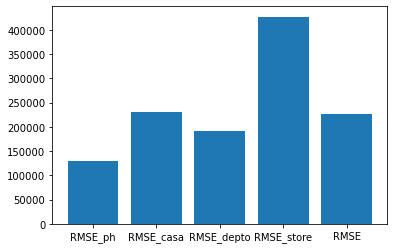

In [65]:
plt.bar(list(rmse_dict.keys()), list(rmse_dict.values()), align='center')